In [88]:
import pandas as pd

plt.style.use('ggplot')

In [89]:
df = pd.read_csv('../../covid-19-data/us-states.csv', index_col=0)

In [90]:
mis = df[df['state'] == 'Missouri']

In [91]:
mis.head()

,state,fips,cases,deaths
date,,,,
2020-03-07,Missouri,29,1,0
2020-03-08,Missouri,29,1,0
2020-03-09,Missouri,29,1,0
2020-03-10,Missouri,29,1,0
2020-03-11,Missouri,29,1,0


In [46]:
mis.drop(columns='state', inplace=True)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
mis.index = pd.to_datetime(mis.index)

In [48]:
mis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 229 entries, 2020-03-07 to 2020-10-21
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   fips    229 non-null    int64
 1   cases   229 non-null    int64
 2   deaths  229 non-null    int64
dtypes: int64(3)
memory usage: 7.2 KB


In [59]:
mis_diff = mis.diff()
mis_diff.dropna(inplace=True)

In [50]:
mis_week = mis_diff.resample('W').mean()

<AxesSubplot:xlabel='date'>

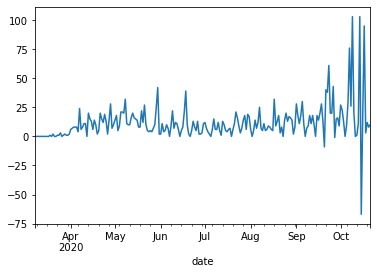

In [60]:
mis_diff['deaths'].plot()

<AxesSubplot:xlabel='date'>

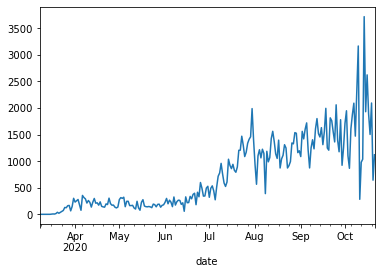

In [61]:
mis_diff['cases'].plot()

In [62]:
from hmmlearn import hmm

In [63]:
model = hmm.GaussianHMM(n_components=3)

In [64]:
X = mis_diff[['cases']]
model.fit(X)

GaussianHMM(n_components=3)

In [65]:
preds = model.predict(X)

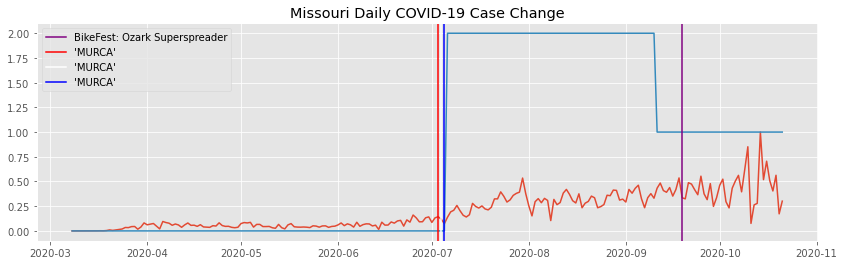

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 4))
plt.plot(X/(X.max() - X.min()))
plt.plot(X.index, preds, marker='')
plt.axvline(x='2020-09-19', color='purple', label='BikeFest: Ozark Superspreader')

plt.axvline(x='2020-07-03', color='red', label="'MURCA'")
plt.axvline(x='2020-07-04', color='white', label="'MURCA'")
plt.axvline(x='2020-07-05', color='blue', label="'MURCA'")
plt.legend()
plt.title('Missouri Daily COVID-19 Case Change');


Link to Missouri Ozarks Bike Fest. It drew thousands of hood rat bikers to spread Covid


https://www.kcur.org/news/2020-09-19/bikefest-draws-thousands-to-lake-of-the-ozarks-health-officials-warn-of-virus-superspreader

Link to Missouri Ozarks July 4 event. 

https://www.ft.com/content/f761e50b-b12f-476d-8137-82d9fa3877cc